<a href="https://colab.research.google.com/github/gpasxos/large-scale-optimization/blob/main/ch02_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal w: [0.5775472  0.55504203]
Optimal b: -0.04313622146105266
Margin width: 2.4968


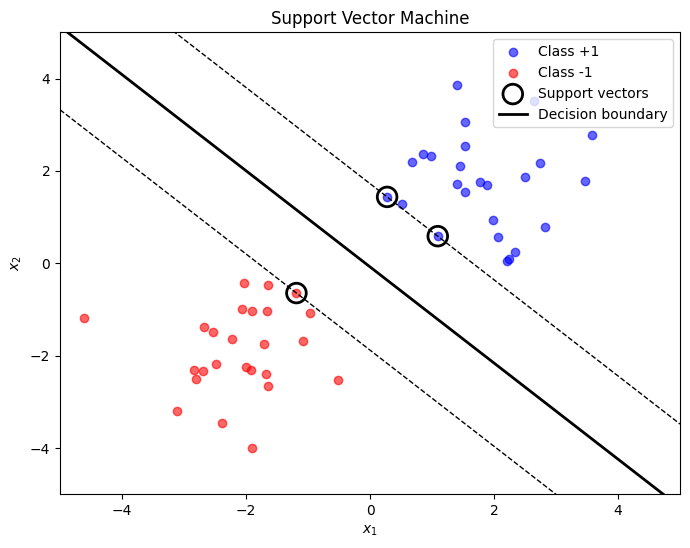

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Generate linearly separable data
np.random.seed(42)
n_samples = 50

# Class +1
X_pos = np.random.randn(n_samples // 2, 2) + np.array([2, 2])
# Class -1
X_neg = np.random.randn(n_samples // 2, 2) + np.array([-2, -2])

X = np.vstack([X_pos, X_neg])
y = np.hstack([np.ones(n_samples // 2), -np.ones(n_samples // 2)])

# Solve hard-margin SVM
n_features = 2
w = cp.Variable(n_features)
b = cp.Variable()

objective = cp.Minimize(0.5 * cp.sum_squares(w))
constraints = [cp.multiply(y, X @ w - b) >= 1]

problem = cp.Problem(objective, constraints)
problem.solve()

print(f"Optimal w: {w.value}")
print(f"Optimal b: {b.value}")
print(f"Margin width: {2 / np.linalg.norm(w.value):.4f}")

# Find support vectors (points where constraint is tight)
margins = y * (X @ w.value - b.value)
support_vectors = np.abs(margins - 1) < 1e-4

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label='Class +1', alpha=0.6)
plt.scatter(X[y==-1, 0], X[y==-1, 1], c='red', label='Class -1', alpha=0.6)
plt.scatter(X[support_vectors, 0], X[support_vectors, 1], s=200, facecolors='none', edgecolors='black', linewidths=2, label='Support vectors')

# Decision boundary and margins
x1_range = np.linspace(-5, 5, 100)
x2_boundary = (b.value - w.value[0] * x1_range) / w.value[1]
x2_margin_pos = (b.value + 1 - w.value[0] * x1_range) / w.value[1]
x2_margin_neg = (b.value - 1 - w.value[0] * x1_range) / w.value[1]

plt.plot(x1_range, x2_boundary, 'k-', linewidth=2, label='Decision boundary')
plt.plot(x1_range, x2_margin_pos, 'k--', linewidth=1)
plt.plot(x1_range, x2_margin_neg, 'k--', linewidth=1)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Support Vector Machine')
plt.savefig('svm.pdf', bbox_inches='tight')
plt.show()